In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In this module, I would like to try to use all the variables given without drop any of them. Descriptions of those variables will be used to clean the data. This is my first module in Kaggle and I am pretty sure there will be many mistakes (codes and other things) as the result of my submission is not that good.

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import os
os.listdir("/kaggle/input")

['house-prices-advanced-regression-techniques']

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor 

In [5]:
train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [6]:
train["SalePrice"] = np.log1p(train["SalePrice"])

In [7]:
X = train.drop(['SalePrice','Id'],axis=1)
Y = train['SalePrice']

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [9]:
X[X.columns[X.isnull().any()]].info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   Alley         91 non-null     object 
 2   MasVnrType    1452 non-null   object 
 3   MasVnrArea    1452 non-null   float64
 4   BsmtQual      1423 non-null   object 
 5   BsmtCond      1423 non-null   object 
 6   BsmtExposure  1422 non-null   object 
 7   BsmtFinType1  1423 non-null   object 
 8   BsmtFinType2  1422 non-null   object 
 9   Electrical    1459 non-null   object 
 10  FireplaceQu   770 non-null    object 
 11  GarageType    1379 non-null   object 
 12  GarageYrBlt   1379 non-null   float64
 13  GarageFinish  1379 non-null   object 
 14  GarageQual    1379 non-null   object 
 15  GarageCond    1379 non-null   object 
 16  PoolQC        7 non-null      object 
 17  Fence         281 non-null    object 
 18  MiscFeature   54 non-null   

Looking up from the data's description, there are several variables containing values of NA which will be assumed to not actually have null value, rather it is stated in the description. These variables are Alley, BsmtQual, BsmtCond, BsmtExposure, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, and MiscFeature. It leaves BsmtFinType1, BsmtFinType2, Electrical, and GarageYrBlt that should be checked before imputing. For Electrical, because there is no other variable that seems related to determine replacement of it's NA value, we will use standard imputation method later.

In [10]:
X['Alley'].fillna("No Alley Access", inplace= True)
X['BsmtQual'].fillna("No Basement", inplace= True)
X['BsmtCond'].fillna("No Basement", inplace= True)
X['BsmtExposure'].fillna("No Basement", inplace= True)
X['BsmtFinType1'].fillna("No Basement", inplace=True)
X['BsmtFinType2'].fillna("No Basement", inplace=True)
X['FireplaceQu'].fillna("No Fireplace", inplace= True)
X['GarageType'].fillna("No Garage", inplace= True)
X['GarageFinish'].fillna("No Garage", inplace= True)
X['GarageQual'].fillna("No Garage", inplace= True)
X['GarageCond'].fillna("No Garage", inplace= True)
X['PoolQC'].fillna("No Pool", inplace= True)
X['Fence'].fillna("No Fence", inplace= True)
X['MiscFeature'].fillna("None", inplace= True)

Checking GarageYrBlt (1460 - 1379 = 81 NAs) Firstly, we will check wheter rows that contain NA in GarageYrBlt also have NA in GarageType/GarageFinish/GarageQual/GarageCond

In [11]:
X['GarageYrBlt'][X['GarageType']=='No Garage'].isna().sum()

81

There are 81 NAs in GarageYrblt that also NA in GarageType. It means all NAs in GarageYrBlt will be replaced by "No Garage" class. Hence variable GarageYrBlt change to categorical variable. We will categorized the years to every decade

In [12]:
X['GarageYrBlt'].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [13]:
pd.DataFrame(X['GarageYrBlt'].value_counts()).tail(20)

,GarageYrBlt
2010.0,3
1952.0,3
1923.0,3
1910.0,3
1932.0,3
1924.0,3
1938.0,3
1937.0,2
1915.0,2
1942.0,2


In [14]:
X['GarageYrBlt'] = X['GarageYrBlt'].astype(str)
X['GarageYrBlt']

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1460, dtype: object

In [15]:
lst = ["191", "192", "193", "194", "195", "196", "197", "198", "199", "200"]
def fun(a):
    for i in lst:
        if i in a:
            return i
    return "No Garage"
X["GarageYrBlt_cat"] = X.GarageYrBlt.apply(lambda x: fun(x))
X[['GarageYrBlt','GarageYrBlt_cat']]

,GarageYrBlt,GarageYrBlt_cat
0,2003.0,200
1,1976.0,197
2,2001.0,200
3,1998.0,199
4,2000.0,200
...,...,...
1455,1999.0,199
1456,1978.0,197
1457,1941.0,194
1458,1950.0,195


In [16]:
pd.DataFrame(X['GarageYrBlt_cat'].value_counts()).tail(20)

,GarageYrBlt_cat
200,399
199,196
197,186
196,185
195,151
198,95
No Garage,87
194,55
192,51
193,41


In [17]:
X2 = X.drop('GarageYrBlt',axis=1)

There are some variables that coded using number but the description is categorical; MSSubclass, OverallQual, OverallCond, and MoSold. For MSSubclass, we weill convert it to categorical variable. The rest seems to explain the quality form 1 to 10, eventhough it looks like these variables can be changed to categorical variable, because the value can be interpreted as the greater the better, we will just use it as numerical variable

In [18]:
X2['MSSubClass'] = X2['MSSubClass'].astype('str')
X2['MoSold'] = X2['MoSold'].astype('str')

In [19]:
X2[X2.columns[X2.isnull().any()]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1201 non-null   float64
 1   MasVnrType   1452 non-null   object 
 2   MasVnrArea   1452 non-null   float64
 3   Electrical   1459 non-null   object 
dtypes: float64(2), object(2)
memory usage: 45.8+ KB



Imputation for categorical variable using mode ang numerical variable using mean or median (we will look at the histogram)

<AxesSubplot:ylabel='Frequency'>

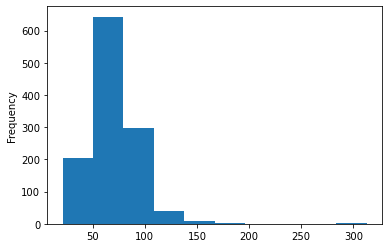

In [20]:
X2['LotFrontage'].plot(kind='hist') # It can be seen that the plot skew, we will use median to impute NA

<AxesSubplot:ylabel='Frequency'>

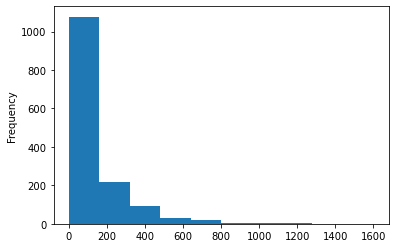

In [21]:
X2['MasVnrArea'].plot(kind='hist') # It can be seen that the plot skew, we will use median to impute NA

In [22]:
X2['MasVnrType'].mode() # NA value in MasVnrType will be imputed by None

0    None
dtype: object

In [23]:
X2['BsmtFinType2'].mode() # NA value in BsmtFinType2 will be imputed by Unf

0    Unf
dtype: object

In [24]:
X2['Electrical'].mode() # NA value in Electrical will be imputed using SBrkr

0    SBrkr
dtype: object

In [25]:
X2['LotFrontage'].fillna(X2['LotFrontage'].median(), inplace= True)
X2['MasVnrArea'].fillna(X2['MasVnrArea'].median(), inplace= True)
X2['MasVnrType'].fillna("None", inplace= True)
X2['BsmtFinType2'].fillna("Unf", inplace= True)
X2['Electrical'].fillna("SBrkr", inplace= True)

In [26]:
X2[X2.columns[X2.isnull().any()]].info() # Recheck

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Empty DataFrame

In [27]:
X2_num = X2.select_dtypes(exclude=np.object)
X2_cat = X2.select_dtypes(np.object)

In [28]:
X2_cat_encoded = pd.get_dummies(X2_cat, columns = list(X2_cat.columns), drop_first = True)

In [29]:
X3 = X2_num.join(X2_cat_encoded)
X3

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageYrBlt_cat_192,GarageYrBlt_cat_193,GarageYrBlt_cat_194,GarageYrBlt_cat_195,GarageYrBlt_cat_196,GarageYrBlt_cat_197,GarageYrBlt_cat_198,GarageYrBlt_cat_199,GarageYrBlt_cat_200,GarageYrBlt_cat_No Garage
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,0,0,0,0,0,1,0
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,0,0,1,0,0,0,0
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,0,0,0,0,0,1,0
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,0,0,0,0,1,0,0
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,5,1999,2000,0.0,0,0,953,...,0,0,0,0,0,0,0,1,0,0
1456,85.0,13175,6,6,1978,1988,119.0,790,163,589,...,0,0,0,0,0,1,0,0,0,0
1457,66.0,9042,7,9,1941,2006,0.0,275,0,877,...,0,0,1,0,0,0,0,0,0,0
1458,68.0,9717,5,6,1950,1996,0.0,49,1029,0,...,0,0,0,1,0,0,0,0,0,0


In [30]:
data_test = test
data_test[data_test.columns[data_test.isnull().any()]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSZoning      1455 non-null   object 
 1   LotFrontage   1232 non-null   float64
 2   Alley         107 non-null    object 
 3   Utilities     1457 non-null   object 
 4   Exterior1st   1458 non-null   object 
 5   Exterior2nd   1458 non-null   object 
 6   MasVnrType    1443 non-null   object 
 7   MasVnrArea    1444 non-null   float64
 8   BsmtQual      1415 non-null   object 
 9   BsmtCond      1414 non-null   object 
 10  BsmtExposure  1415 non-null   object 
 11  BsmtFinType1  1417 non-null   object 
 12  BsmtFinSF1    1458 non-null   float64
 13  BsmtFinType2  1417 non-null   object 
 14  BsmtFinSF2    1458 non-null   float64
 15  BsmtUnfSF     1458 non-null   float64
 16  TotalBsmtSF   1458 non-null   float64
 17  BsmtFullBath  1457 non-null   float64
 18  BsmtHalfBath  1457 non-null 

Just like in train dataset, we will use the description given in dataset to impute any missing value first, then we proceed using the same method as before for the remaining.

From the description, NA values in Alley, BsmtQual, BsmtCond, BsmtExposure, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, and MiscFeature.

In [31]:
data_test['Alley'].fillna("No Alley Access", inplace= True)
data_test['BsmtQual'].fillna("No Basement", inplace= True)
data_test['BsmtCond'].fillna("No Basement", inplace= True)
data_test['BsmtExposure'].fillna("No Basement", inplace= True)
data_test['BsmtFinType1'].fillna("No Basement", inplace= True)
data_test['BsmtFinType2'].fillna("No Basement", inplace= True)
data_test['FireplaceQu'].fillna("No Fireplace", inplace= True)
data_test['GarageType'].fillna("No Garage", inplace= True)
data_test['GarageFinish'].fillna("No Garage", inplace= True)
data_test['GarageQual'].fillna("No Garage", inplace= True)
data_test['GarageCond'].fillna("No Garage", inplace= True)
data_test['PoolQC'].fillna("No Pool", inplace= True)
data_test['Fence'].fillna("No Fence", inplace= True)
data_test['MiscFeature'].fillna("None", inplace= True)
data_test['GarageCond'].fillna("No Garage", inplace= True)
data_test['GarageCond'].fillna("No Garage", inplace= True)

In [32]:
data_test[data_test.columns[data_test.isnull().any()]].info() # Recheck

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSZoning      1455 non-null   object 
 1   LotFrontage   1232 non-null   float64
 2   Utilities     1457 non-null   object 
 3   Exterior1st   1458 non-null   object 
 4   Exterior2nd   1458 non-null   object 
 5   MasVnrType    1443 non-null   object 
 6   MasVnrArea    1444 non-null   float64
 7   BsmtFinSF1    1458 non-null   float64
 8   BsmtFinSF2    1458 non-null   float64
 9   BsmtUnfSF     1458 non-null   float64
 10  TotalBsmtSF   1458 non-null   float64
 11  BsmtFullBath  1457 non-null   float64
 12  BsmtHalfBath  1457 non-null   float64
 13  KitchenQual   1458 non-null   object 
 14  Functional    1457 non-null   object 
 15  GarageYrBlt   1381 non-null   float64
 16  GarageCars    1458 non-null   float64
 17  GarageArea    1458 non-null   float64
 18  SaleType      1458 non-null 

BsmtFinSF1/BsmtFinSF2 will have 0 value when BsmtFinType1's/BsmtFinType2's category is No Garage. BsmtUnfSF, TotalBsmtSF, BsmtFullBath, BsmtHalfBath will also have 0 value if either BsmtQual, BsmtCond and BsmtExposure have No Garage as it's category. If GarageType's, GarageFinish's, GarageQual's, or GarageCond's category is No Garage, then GarageYrBlt will have No Garage category, and GarageCars and GarageArea will have 0 value.

In [33]:
data_test['BsmtFinSF1'][data_test['BsmtFinType1']=='No Basement'].isna().sum()

1

In [34]:
data_test['BsmtFinSF2'][data_test['BsmtFinType2']=='No Basement'].isna().sum()

1

In [35]:
data_test['BsmtUnfSF'][data_test['BsmtQual']=='No Basement'].isna().sum()

1

In [36]:
data_test['TotalBsmtSF'][data_test['BsmtQual']=='No Basement'].isna().sum()

1

In [37]:
data_test['BsmtFullBath'][data_test['BsmtQual']=='No Basement'].isna().sum()

2

In [38]:
data_test['BsmtHalfBath'][data_test['BsmtQual']=='No Basement'].isna().sum()

2

In [39]:
data_test['GarageYrBlt'][data_test['GarageCond']=='No Garage'].isna().sum()

78

In [40]:
data_test['GarageCars'][data_test['GarageCond']=='No Garage'].isna().sum()

1

In [41]:
data_test['GarageArea'][data_test['GarageCond']=='No Garage'].isna().sum()

1

In [42]:
data_test['BsmtFinSF1'].fillna(0, inplace=True)
data_test['BsmtFinSF2'].fillna(0, inplace=True)
data_test['BsmtUnfSF'].fillna(0, inplace=True)
data_test['TotalBsmtSF'].fillna(0, inplace=True)
data_test['BsmtFullBath'].fillna(0, inplace=True)
data_test['BsmtHalfBath'].fillna(0, inplace=True)
data_test['GarageYrBlt'].fillna('No Garage', inplace=True)
data_test['GarageCars'].fillna(0, inplace=True)
data_test['GarageArea'].fillna(0, inplace=True)

In [43]:
data_test[data_test.columns[data_test.isnull().any()]].info() # Recheck

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSZoning     1455 non-null   object 
 1   LotFrontage  1232 non-null   float64
 2   Utilities    1457 non-null   object 
 3   Exterior1st  1458 non-null   object 
 4   Exterior2nd  1458 non-null   object 
 5   MasVnrType   1443 non-null   object 
 6   MasVnrArea   1444 non-null   float64
 7   KitchenQual  1458 non-null   object 
 8   Functional   1457 non-null   object 
 9   SaleType     1458 non-null   object 
dtypes: float64(2), object(8)
memory usage: 114.1+ KB


<AxesSubplot:ylabel='Frequency'>

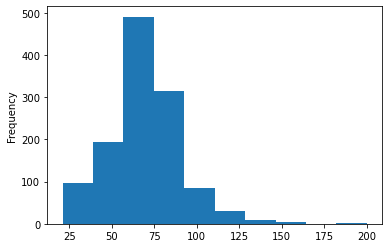

In [44]:
data_test['LotFrontage'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

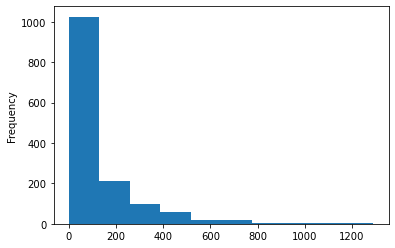

In [45]:
data_test['MasVnrArea'].plot(kind='hist')

In [46]:
data_test['MSZoning'].fillna(data_test['MSZoning'].mode()[0], inplace=True)
data_test['LotFrontage'].fillna(data_test['LotFrontage'].median(), inplace=True)
data_test['Utilities'].fillna(data_test['Utilities'].mode()[0], inplace=True)
data_test['Exterior1st'].fillna(data_test['Exterior1st'].mode()[0], inplace=True)
data_test['Exterior2nd'].fillna(data_test['Exterior2nd'].mode()[0], inplace=True)
data_test['MasVnrType'].fillna(data_test['MasVnrType'].mode()[0], inplace=True)
data_test['MasVnrArea'].fillna(data_test['MasVnrArea'].median(), inplace=True)
data_test['KitchenQual'].fillna(data_test['KitchenQual'].mode()[0], inplace=True)
data_test['Functional'].fillna(data_test['Functional'].mode()[0], inplace=True)
data_test['SaleType'].fillna(data_test['SaleType'].mode()[0], inplace=True)

In [47]:
data_test[data_test.columns[data_test.isnull().any()]].info() # Recheck

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Empty DataFrame

In [48]:
data_test['GarageYrBlt'] = data_test['GarageYrBlt'].astype(str)
data_test['GarageYrBlt']

0          1961.0
1          1958.0
2          1997.0
3          1998.0
4          1992.0
          ...    
1454    No Garage
1455       1970.0
1456       1960.0
1457    No Garage
1458       1993.0
Name: GarageYrBlt, Length: 1459, dtype: object

In [49]:
lst = ["191", "192", "193", "194", "195", "196", "197", "198", "199", "200"]
def fun(a):
    for i in lst:
        if i in a:
            return i
    return "No Garage"
data_test["GarageYrBlt_cat"] = data_test.GarageYrBlt.apply(lambda x: fun(x))
data_test[['GarageYrBlt','GarageYrBlt_cat']]

,GarageYrBlt,GarageYrBlt_cat
0,1961.0,196
1,1958.0,195
2,1997.0,199
3,1998.0,199
4,1992.0,199
...,...,...
1454,No Garage,No Garage
1455,1970.0,197
1456,1960.0,196
1457,No Garage,No Garage


In [50]:
data_test2 = data_test.drop(['GarageYrBlt','Id'],axis=1)

In [51]:
data_test2['MSSubClass'] = data_test2['MSSubClass'].astype('str')
data_test2['MoSold'] = data_test2['MoSold'].astype('str')

In [52]:
data_test2_num = data_test2.select_dtypes(exclude=np.object)
data_test2_cat = data_test2.select_dtypes(np.object)

In [53]:
data_test2_cat_encoded = pd.get_dummies(data_test2_cat, columns = list(data_test2_cat.columns), drop_first = True)

In [54]:
data_test3 = data_test2_num.join(data_test2_cat_encoded)
data_test3

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageYrBlt_cat_192,GarageYrBlt_cat_193,GarageYrBlt_cat_194,GarageYrBlt_cat_195,GarageYrBlt_cat_196,GarageYrBlt_cat_197,GarageYrBlt_cat_198,GarageYrBlt_cat_199,GarageYrBlt_cat_200,GarageYrBlt_cat_No Garage
0,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,0,0
1,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,1,0,0,0,0,0,0
2,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,0,0,0,1,0,0
3,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,...,0,0,0,0,0,0,0,1,0,0
4,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,...,0,0,0,0,0,0,0,0,0,1
1455,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,...,0,0,0,0,0,1,0,0,0,0
1456,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1457,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,...,0,0,0,0,0,0,0,0,0,1


Because there might be some dummy variables in testing data but not in training data (or vice versa), I will just list them all and add those variables manually with zero value.

In [55]:
a = list(X3.columns)
b = list(data_test3.columns)

In [56]:
list_difference = []
for item in a:
  if item not in b:
    list_difference.append(item)

print(list_difference)

['Utilities_NoSeWa', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'HouseStyle_2.5Fin', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_Other', 'Heating_GasA', 'Heating_OthW', 'Electrical_Mix', 'GarageQual_Fa', 'PoolQC_Fa', 'MiscFeature_TenC']


In [57]:
list_difference2 = []
for item in b:
  if item not in a:
    list_difference2.append(item)

print(list_difference2)

['MSSubClass_150']


In [58]:
X3['MSSubClass_150'] = 0
X3['MSSubClass_150']

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: MSSubClass_150, Length: 1460, dtype: int64

In [59]:
data_test3['Utilities_NoSeWa'] = 0
data_test3['Condition2_RRAe'] = 0
data_test3['Condition2_RRAn'] = 0
data_test3['Condition2_RRNn'] = 0
data_test3['HouseStyle_2.5Fin'] = 0
data_test3['RoofMatl_Metal'] = 0
data_test3['RoofMatl_Membran'] = 0
data_test3['RoofMatl_Roll'] = 0
data_test3['Exterior1st_ImStucc'] = 0
data_test3['Exterior1st_Stone'] = 0
data_test3['Exterior2nd_Other'] = 0
data_test3['Heating_GasA'] = 0
data_test3['Heating_OthW'] = 0
data_test3['Electrical_Mix'] = 0
data_test3['GarageQual_Fa'] = 0
data_test3['PoolQC_Fa'] = 0
data_test3['RoofMatl_CompShg'] = 0
data_test3['MiscFeature_TenC'] = 0

Using X3 dataset, I will train my model using linear regression and random forest. Here, X3 will be splitted to train and test dataset, then I calculate RMSE of prediction using test data (because the evaluation metric used for evaluation in this competition is RMSE). First, code below is used for linear regression.

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X3, Y, test_size=0.2, random_state=13)

In [61]:
reg = LinearRegression()  
reg.fit(X_train, Y_train) #training the algorithm

LinearRegression()

In [75]:
y_pred = reg.predict(X_test)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Root Mean Squared Error: 0.23589955342727265


Using linear regression as my model, I get RMSE score around 0.236. Then, using this model, I can get the prediction from real test data set which only contain explanatory variables.

In [63]:
y_data_test = reg.predict(data_test3)
prediction = pd.Series(np.expm1(y_data_test))
prediction

0        62666.685180
1        72779.494867
2       103193.848815
3       175384.669734
4       107619.536633
            ...      
1454    187305.408465
1455     41202.223082
1456     95923.612108
1457    107912.916642
1458    188376.344860
Length: 1459, dtype: float64

Next, I will try using random forest for my model and see wheter I can get lower scor for MAE/MSE/RMSE. In this model, I will try using different value of parameters model and find the best result using cross validation.

In [64]:
rf = RandomForestRegressor(random_state=13)

In [65]:
rf_grid_params = {
    'max_depth': [50, 70, 100],
    'min_samples_leaf': [3, 5, 7],
    'min_samples_split': [10, 25, 50],
    'n_estimators': [50, 100, 200]
}
rf_grid_search = GridSearchCV(estimator = rf, param_grid = rf_grid_params)

In [66]:
rf_grid_search.fit(X_train, Y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=13),
             param_grid={'max_depth': [50, 70, 100],
                         'min_samples_leaf': [3, 5, 7],
                         'min_samples_split': [10, 25, 50],
                         'n_estimators': [50, 100, 200]})

In [67]:
rf_grid_search.best_params_

{'max_depth': 50,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 200}

I get list of the best parameter: 50 for max_depth, 3 for min_sample_leaf, 10 for min_sample_split, and 200 for n_estimators. Using this set of parameter, I will build my random forest model and train it again using splitted train data set.

In [68]:
rf_model = RandomForestRegressor(random_state = 13, max_depth= 50, min_samples_leaf= 3, min_samples_split= 10, n_estimators = 200)

In [69]:
rfm = rf_model.fit(X_train,Y_train)

In [70]:
rf_pred =rfm.predict(X_test)

In [74]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, rf_pred)))

Root Mean Squared Error: 0.17829092024966187


Random forest model give different RMSE score fom linear regression model. RMSE score of RF model is around 0.178, lower than RMSE score for linear regression model 0.236. By using random forest and tuning some of its hyperparameter, I can get lower RMSE than linear regression. So I will use RF model to make prediction using real test dataset.

In [72]:
rf_pred_test = rfm.predict(data_test3)

In [73]:
rf_SalesPred = pd.Series(np.expm1(rf_pred))
rf_SalesPred

0      162857.626628
1      288636.935674
2      310470.031016
3      148025.775517
4      145221.900866
           ...      
287    145118.412393
288    562167.558952
289    119174.595656
290     78376.481642
291    119226.801911
Length: 292, dtype: float64

In this module, as I had mention above, I am only interested in using all expalantory variables from dataset. In practice, we can do a selection for which variables will be used to train our model, because it may be better to drop some variables so that our model give a better prediction.